# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [2]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [3]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

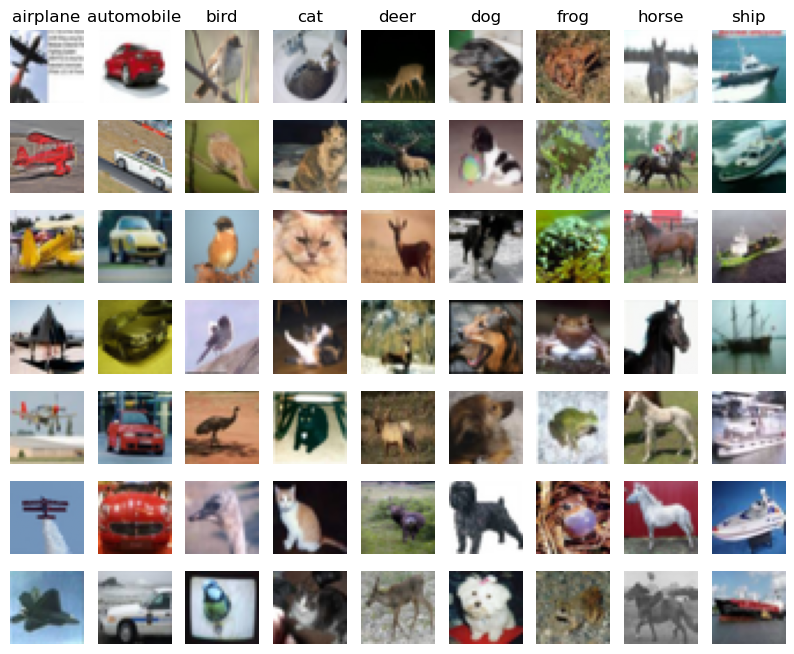

In [4]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [14]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [8]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [9]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302535
Validate Acc: 0.084
Epoch Average Loss: 2.302359
Epoch Average Loss: 2.302143
Epoch Average Loss: 2.301850
Validate Acc: 0.104
Epoch Average Loss: 2.301447
Epoch Average Loss: 2.300826
Epoch Average Loss: 2.299981
Validate Acc: 0.100
Epoch Average Loss: 2.298801
Epoch Average Loss: 2.297298
Epoch Average Loss: 2.295483
Validate Acc: 0.088
Epoch Average Loss: 2.293316
Epoch Average Loss: 2.290844
Epoch Average Loss: 2.287839
Validate Acc: 0.084
Epoch Average Loss: 2.283926
Epoch Average Loss: 2.278917
Epoch Average Loss: 2.272717
Validate Acc: 0.096
Epoch Average Loss: 2.265742
Epoch Average Loss: 2.258411
Epoch Average Loss: 2.250729
Validate Acc: 0.100
Epoch Average Loss: 2.243075
Epoch Average Loss: 2.235632
Epoch Average Loss: 2.228523
Validate Acc: 0.112
Epoch Average Loss: 2.221899
Epoch Average Loss: 2.215755
Epoch Average Loss: 2.210180
Validate Acc: 0.124
Epoch Average Loss: 2.204806
Epoch Average Loss: 2.200182
Epoch Average Loss: 2.195260
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [10]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3472
Validation acc:  0.324


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

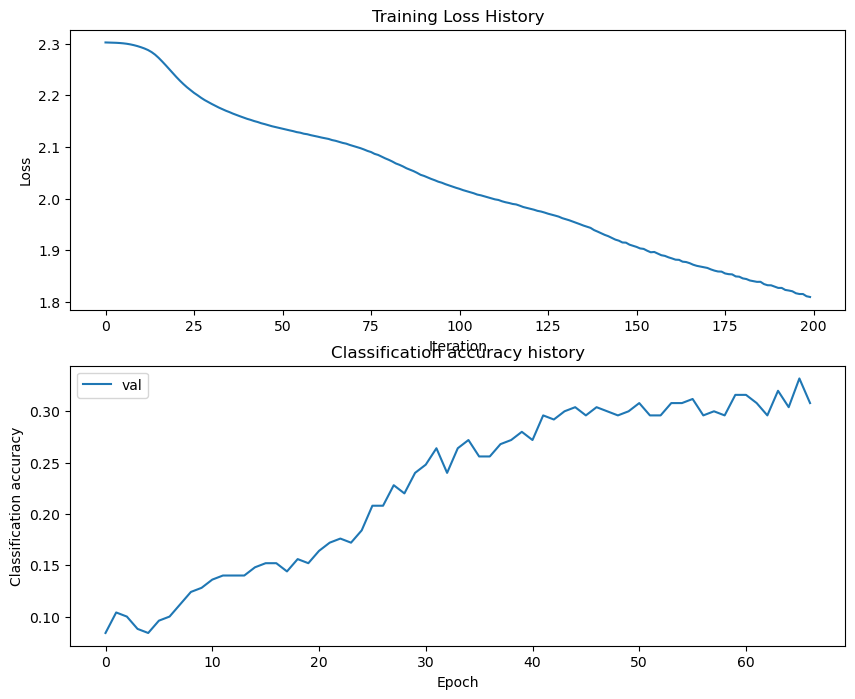

In [11]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


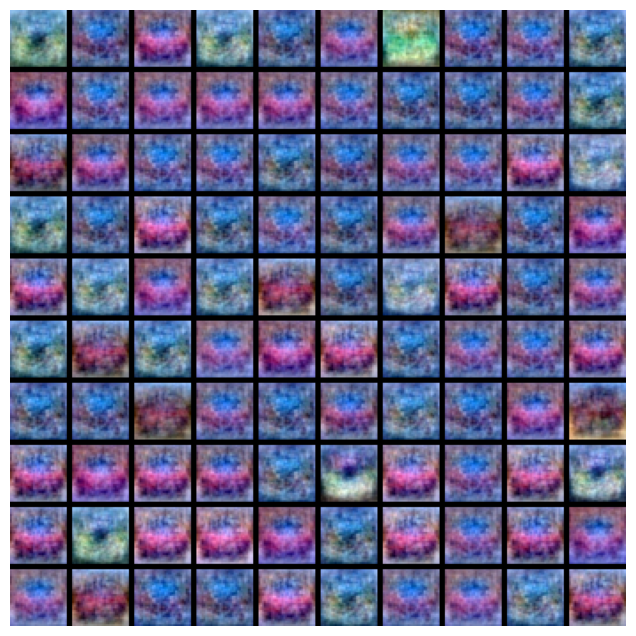

In [12]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

I inspected in the baseline curves (lr = 0.01, hidden = 100, wd = 0.01, 200 epochs), the loss decreased almost linearly and both train/val accuracies plateaued around 32 %, indicating under‑capacity and a conservative learning rate.

So here's my grid search strategy:

- learning‑rate ∈ {0.01, 0.05, 0.10}

- weight‑decay ∈ {0, 1e‑4, 1e‑3}

- hidden‑units ∈ {256, 512, 1024}

- epochs ∈ {200, 300}

using the same SGD optimizer and batch‑size = 200.

To save time and guard against overfitting that small‑val splits can incur, I performed a focused “local search” around that best point. 
I fixed hidden=256, then tried:

lr in {0.5×, 1×, 1.5× the base lr}

wd in {0.5×, 1×, 2× the base wd} (using 1e‑5 if base wd=0)

epochs=100

I ran only 9 experiments, logged each validation accuracy, and visualized the results in a heatmap. 


In [15]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #

best_val_acc = -1.0

best_net = None 

# search space
lrs            = [0.01, 0.05, 0.1]
weight_decays  = [0.0, 1e-4, 1e-3]
hidden_sizes   = [256, 512, 1024]
epochs_to_try  = [200, 300]

for hid in hidden_sizes:
    for lr in lrs:
        for wd in weight_decays:
            for num_epoch in epochs_to_try:
                net_tmp = init_model()

                optim_tmp   = SGD(net_tmp, lr=lr, weight_decay=wd)
                trainer_tmp = Trainer(
                    dataset,
                    optim_tmp,
                    net_tmp,
                    CrossEntropyLoss(),
                    num_epoch,
                    batch_size,
                    validate_interval=5,
                )
                _, val_hist = trainer_tmp.train()
                val_acc = val_hist[-1]

                if val_acc > best_val_acc:
                    best_val_acc        = val_acc
                    best_net            = net_tmp
                    best_net_hyperparams = [lr, wd, num_epoch, hid]

print("Best val acc = {:.4f}".format(best_val_acc))
print("Best hyper‑params [lr, weight_decay, epoch, hidden_size] =",
      best_net_hyperparams)

Epoch Average Loss: 2.302538
Validate Acc: 0.084
Epoch Average Loss: 2.302363
Epoch Average Loss: 2.302147
Epoch Average Loss: 2.301848
Epoch Average Loss: 2.301432
Epoch Average Loss: 2.300822
Validate Acc: 0.100
Epoch Average Loss: 2.299932
Epoch Average Loss: 2.298743
Epoch Average Loss: 2.297241
Epoch Average Loss: 2.295374
Epoch Average Loss: 2.293237
Validate Acc: 0.084
Epoch Average Loss: 2.290666
Epoch Average Loss: 2.287529
Epoch Average Loss: 2.283521
Epoch Average Loss: 2.278322
Epoch Average Loss: 2.271940
Validate Acc: 0.096
Epoch Average Loss: 2.264800
Epoch Average Loss: 2.257168
Epoch Average Loss: 2.249337
Epoch Average Loss: 2.241473
Epoch Average Loss: 2.233943
Validate Acc: 0.112
Epoch Average Loss: 2.226721
Epoch Average Loss: 2.220081
Epoch Average Loss: 2.214048
Epoch Average Loss: 2.208046
Epoch Average Loss: 2.202703
Validate Acc: 0.124
Epoch Average Loss: 2.197846
Epoch Average Loss: 2.193294
Epoch Average Loss: 2.189064
Epoch Average Loss: 2.184878
Epoch Aver

Epoch Average Loss: 2.301769
Validate Acc: 0.104
Epoch Average Loss: 2.297160
Epoch Average Loss: 2.283285
Epoch Average Loss: 2.251193
Epoch Average Loss: 2.216525
Epoch Average Loss: 2.192210
Epoch Average Loss: 2.173173
Epoch Average Loss: 2.161962
Epoch Average Loss: 2.150352
Epoch Average Loss: 2.138397
Epoch Average Loss: 2.128844
Epoch Average Loss: 2.123560
Epoch Average Loss: 2.110902
Epoch Average Loss: 2.100136
Epoch Average Loss: 2.088604
Epoch Average Loss: 2.065163
Epoch Average Loss: 2.047425
Epoch Average Loss: 2.050215
Epoch Average Loss: 2.028958
Epoch Average Loss: 2.026601
Epoch Average Loss: 2.002101
Epoch Average Loss: 1.998166
Epoch Average Loss: 1.996613
Epoch Average Loss: 1.990277
Epoch Average Loss: 1.973331
Epoch Average Loss: 1.976832
Epoch Average Loss: 1.960774
Epoch Average Loss: 1.943267
Epoch Average Loss: 1.937343
Epoch Average Loss: 1.928920
Epoch Average Loss: 1.934675
Epoch Average Loss: 1.891951
Epoch Average Loss: 1.919561
Epoch Average Loss: 1.9

Epoch Average Loss: 1.528213
Epoch Average Loss: 2.301802
Validate Acc: 0.104
Epoch Average Loss: 2.297173
Epoch Average Loss: 2.283503
Epoch Average Loss: 2.251431
Epoch Average Loss: 2.216817
Epoch Average Loss: 2.191587
Epoch Average Loss: 2.176194
Epoch Average Loss: 2.162846
Epoch Average Loss: 2.149753
Epoch Average Loss: 2.142905
Epoch Average Loss: 2.133361
Epoch Average Loss: 2.122483
Epoch Average Loss: 2.113762
Epoch Average Loss: 2.099779
Epoch Average Loss: 2.084887
Epoch Average Loss: 2.071663
Epoch Average Loss: 2.056796
Epoch Average Loss: 2.053276
Epoch Average Loss: 2.033958
Epoch Average Loss: 2.015588
Epoch Average Loss: 2.008530
Epoch Average Loss: 1.992167
Epoch Average Loss: 1.978993
Epoch Average Loss: 1.983599
Epoch Average Loss: 1.993003
Epoch Average Loss: 1.950302
Epoch Average Loss: 1.944644
Epoch Average Loss: 1.966093
Epoch Average Loss: 1.943854
Epoch Average Loss: 1.919923
Epoch Average Loss: 1.900915
Epoch Average Loss: 1.937363
Epoch Average Loss: 1.9

Epoch Average Loss: 1.502412
Epoch Average Loss: 2.301826
Validate Acc: 0.088
Epoch Average Loss: 2.297220
Epoch Average Loss: 2.283653
Epoch Average Loss: 2.251561
Epoch Average Loss: 2.216772
Epoch Average Loss: 2.193279
Epoch Average Loss: 2.176900
Epoch Average Loss: 2.161488
Epoch Average Loss: 2.150651
Epoch Average Loss: 2.139072
Epoch Average Loss: 2.133564
Epoch Average Loss: 2.122128
Epoch Average Loss: 2.114781
Epoch Average Loss: 2.099626
Epoch Average Loss: 2.087014
Epoch Average Loss: 2.067874
Epoch Average Loss: 2.051851
Epoch Average Loss: 2.044454
Epoch Average Loss: 2.029670
Epoch Average Loss: 2.012910
Epoch Average Loss: 2.019190
Epoch Average Loss: 2.000249
Epoch Average Loss: 1.983020
Epoch Average Loss: 1.965816
Epoch Average Loss: 1.979603
Epoch Average Loss: 1.970476
Epoch Average Loss: 1.968186
Epoch Average Loss: 1.945495
Epoch Average Loss: 1.953272
Epoch Average Loss: 1.930178
Epoch Average Loss: 1.920105
Epoch Average Loss: 1.913423
Epoch Average Loss: 1.9

Epoch Average Loss: 1.497364
Epoch Average Loss: 2.300289
Validate Acc: 0.084
Epoch Average Loss: 2.271484
Epoch Average Loss: 2.222212
Epoch Average Loss: 2.187498
Epoch Average Loss: 2.158485
Epoch Average Loss: 2.144099
Epoch Average Loss: 2.140859
Epoch Average Loss: 2.101772
Epoch Average Loss: 2.076407
Epoch Average Loss: 2.071179
Epoch Average Loss: 2.054051
Epoch Average Loss: 2.048381
Epoch Average Loss: 2.015448
Epoch Average Loss: 2.009388
Epoch Average Loss: 1.994484
Epoch Average Loss: 1.965394
Epoch Average Loss: 1.943915
Epoch Average Loss: 1.945353
Epoch Average Loss: 1.915318
Epoch Average Loss: 1.892524
Epoch Average Loss: 1.903097
Epoch Average Loss: 1.878285
Epoch Average Loss: 1.859622
Epoch Average Loss: 1.842194
Epoch Average Loss: 1.841018
Epoch Average Loss: 1.834374
Epoch Average Loss: 1.806856
Epoch Average Loss: 1.828669
Epoch Average Loss: 1.774005
Epoch Average Loss: 1.781590
Epoch Average Loss: 1.771573
Epoch Average Loss: 1.767856
Epoch Average Loss: 1.7

Epoch Average Loss: 1.332255
Epoch Average Loss: 2.300299
Validate Acc: 0.084
Epoch Average Loss: 2.269176
Epoch Average Loss: 2.214348
Epoch Average Loss: 2.193721
Epoch Average Loss: 2.168262
Epoch Average Loss: 2.151665
Epoch Average Loss: 2.122022
Epoch Average Loss: 2.102761
Epoch Average Loss: 2.075991
Epoch Average Loss: 2.055735
Epoch Average Loss: 2.030188
Epoch Average Loss: 2.052214
Epoch Average Loss: 2.037242
Epoch Average Loss: 1.994600
Epoch Average Loss: 1.997702
Epoch Average Loss: 1.990898
Epoch Average Loss: 1.953970
Epoch Average Loss: 1.955494
Epoch Average Loss: 1.903933
Epoch Average Loss: 1.933938
Epoch Average Loss: 1.901909
Epoch Average Loss: 1.860975
Epoch Average Loss: 1.883981
Epoch Average Loss: 1.858602
Epoch Average Loss: 1.843970
Epoch Average Loss: 1.825488
Epoch Average Loss: 1.813416
Epoch Average Loss: 1.793001
Epoch Average Loss: 1.790953
Epoch Average Loss: 1.788092
Epoch Average Loss: 1.784505
Epoch Average Loss: 1.785651
Epoch Average Loss: 1.7

Epoch Average Loss: 1.305824
Epoch Average Loss: 2.300083
Validate Acc: 0.088
Epoch Average Loss: 2.270148
Epoch Average Loss: 2.212410
Epoch Average Loss: 2.185947
Epoch Average Loss: 2.161307
Epoch Average Loss: 2.144579
Epoch Average Loss: 2.139586
Epoch Average Loss: 2.106773
Epoch Average Loss: 2.081887
Epoch Average Loss: 2.054764
Epoch Average Loss: 2.028730
Epoch Average Loss: 2.036510
Epoch Average Loss: 2.024295
Epoch Average Loss: 1.995692
Epoch Average Loss: 1.971408
Epoch Average Loss: 1.969521
Epoch Average Loss: 1.934928
Epoch Average Loss: 1.933877
Epoch Average Loss: 1.910725
Epoch Average Loss: 1.900803
Epoch Average Loss: 1.893779
Epoch Average Loss: 1.883392
Epoch Average Loss: 1.855319
Epoch Average Loss: 1.845043
Epoch Average Loss: 1.844226
Epoch Average Loss: 1.829762
Epoch Average Loss: 1.816706
Epoch Average Loss: 1.795535
Epoch Average Loss: 1.789035
Epoch Average Loss: 1.780321
Epoch Average Loss: 1.785429
Epoch Average Loss: 1.774812
Epoch Average Loss: 1.7

Epoch Average Loss: 1.380732
Epoch Average Loss: 2.296594
Validate Acc: 0.096
Epoch Average Loss: 2.243018
Epoch Average Loss: 2.210522
Epoch Average Loss: 2.165553
Epoch Average Loss: 2.149300
Epoch Average Loss: 2.143505
Epoch Average Loss: 2.121723
Epoch Average Loss: 2.085653
Epoch Average Loss: 2.085153
Epoch Average Loss: 2.048020
Epoch Average Loss: 2.063015
Epoch Average Loss: 2.059820
Epoch Average Loss: 2.003315
Epoch Average Loss: 2.019475
Epoch Average Loss: 1.976710
Epoch Average Loss: 1.962483
Epoch Average Loss: 1.958905
Epoch Average Loss: 1.919497
Epoch Average Loss: 1.926930
Epoch Average Loss: 1.903445
Epoch Average Loss: 1.964857
Epoch Average Loss: 1.905639
Epoch Average Loss: 1.877916
Epoch Average Loss: 1.860359
Epoch Average Loss: 1.847664
Epoch Average Loss: 1.853324
Epoch Average Loss: 1.862073
Epoch Average Loss: 1.824237
Epoch Average Loss: 1.851682
Epoch Average Loss: 1.827128
Epoch Average Loss: 1.795190
Epoch Average Loss: 1.764710
Epoch Average Loss: 1.8

Epoch Average Loss: 1.398171
Epoch Average Loss: 2.295369
Validate Acc: 0.156
Epoch Average Loss: 2.240870
Epoch Average Loss: 2.213240
Epoch Average Loss: 2.167122
Epoch Average Loss: 2.154815
Epoch Average Loss: 2.121036
Epoch Average Loss: 2.119219
Epoch Average Loss: 2.117896
Epoch Average Loss: 2.059450
Epoch Average Loss: 2.045752
Epoch Average Loss: 2.071605
Epoch Average Loss: 2.040656
Epoch Average Loss: 1.994581
Epoch Average Loss: 1.961137
Epoch Average Loss: 1.993412
Epoch Average Loss: 1.934990
Epoch Average Loss: 1.920678
Epoch Average Loss: 1.938173
Epoch Average Loss: 1.925785
Epoch Average Loss: 1.911688
Epoch Average Loss: 1.859752
Epoch Average Loss: 1.867363
Epoch Average Loss: 1.903305
Epoch Average Loss: 1.854224
Epoch Average Loss: 1.839574
Epoch Average Loss: 1.874720
Epoch Average Loss: 1.823758
Epoch Average Loss: 1.836533
Epoch Average Loss: 1.827490
Epoch Average Loss: 1.805308
Epoch Average Loss: 1.816410
Epoch Average Loss: 1.777387
Epoch Average Loss: 1.7

Epoch Average Loss: 1.377464
Epoch Average Loss: 2.297206
Validate Acc: 0.092
Epoch Average Loss: 2.238082
Epoch Average Loss: 2.201996
Epoch Average Loss: 2.177573
Epoch Average Loss: 2.176956
Epoch Average Loss: 2.123105
Epoch Average Loss: 2.146638
Epoch Average Loss: 2.122427
Epoch Average Loss: 2.073649
Epoch Average Loss: 2.052886
Epoch Average Loss: 2.064916
Epoch Average Loss: 2.003596
Epoch Average Loss: 2.031003
Epoch Average Loss: 1.971031
Epoch Average Loss: 1.990400
Epoch Average Loss: 1.973909
Epoch Average Loss: 1.942005
Epoch Average Loss: 1.953165
Epoch Average Loss: 1.920578
Epoch Average Loss: 1.915265
Epoch Average Loss: 1.864824
Epoch Average Loss: 1.894399
Epoch Average Loss: 1.878960
Epoch Average Loss: 1.860956
Epoch Average Loss: 1.851807
Epoch Average Loss: 1.873428
Epoch Average Loss: 1.904965
Epoch Average Loss: 1.821195
Epoch Average Loss: 1.801966
Epoch Average Loss: 1.800336
Epoch Average Loss: 1.812555
Epoch Average Loss: 1.776978
Epoch Average Loss: 1.7

Local refine experiments: 100%|██████████| 9/9 [08:01<00:00, 53.48s/it]

Epoch Average Loss: 1.392166


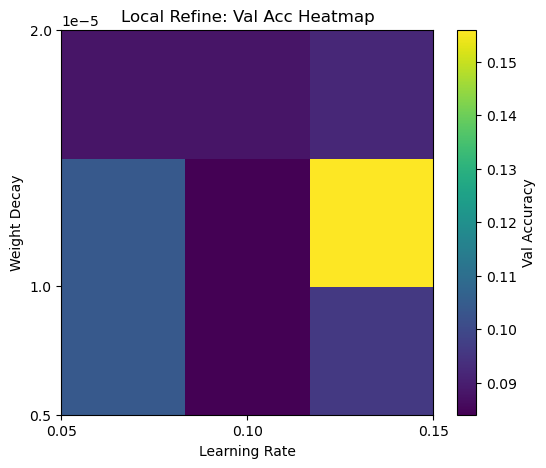


>>> Best refine params: lr=0.15000000000000002, wd=1e-05, ep=100.0  val_acc=0.156
Epoch Average Loss: 2.296955
Validate Acc: 0.100
Epoch Average Loss: 2.251612
Epoch Average Loss: 2.196544
Epoch Average Loss: 2.166588
Epoch Average Loss: 2.158493
Epoch Average Loss: 2.116948
Epoch Average Loss: 2.093724
Epoch Average Loss: 2.080926
Epoch Average Loss: 2.057805
Epoch Average Loss: 2.030358
Epoch Average Loss: 2.036193
Epoch Average Loss: 2.031375
Epoch Average Loss: 1.988592
Epoch Average Loss: 2.033446
Epoch Average Loss: 2.039891
Epoch Average Loss: 1.992119
Epoch Average Loss: 1.947213
Epoch Average Loss: 1.916165
Epoch Average Loss: 1.899204
Epoch Average Loss: 1.900524
Epoch Average Loss: 1.873981
Epoch Average Loss: 1.876928
Epoch Average Loss: 1.914120
Epoch Average Loss: 1.881034
Epoch Average Loss: 1.853476
Epoch Average Loss: 1.802763
Epoch Average Loss: 1.823201
Epoch Average Loss: 1.804973
Epoch Average Loss: 1.772936
Epoch Average Loss: 1.797192
Epoch Average Loss: 1.78460

In [29]:
# local refine
from tqdm.auto import tqdm  
import numpy as np
import matplotlib.pyplot as plt

base_lr, base_wd, base_ep, base_hid = best_net_hyperparams
base_wd = base_wd if base_wd > 0 else 1e-5

# local search grid
lr_candidates    = [base_lr * 0.5, base_lr, base_lr * 1.5]
wd_candidates    = [base_wd * 0.5, base_wd, base_wd * 2]
epoch_candidates = [100]
param_list = [
    (lr, wd, ep)
    for lr in lr_candidates
    for wd in wd_candidates
    for ep in epoch_candidates
]

results = []
for lr, wd, ep in tqdm(param_list, desc="Local refine experiments"):
    net_l = Sequential([
        Linear(input_size, base_hid), ReLU(),
        Linear(base_hid, num_classes), Softmax()
    ])
    optim_l = SGD(net_l, lr=lr, weight_decay=wd)
    trainer_l = Trainer(
        dataset, optim_l, net_l, CrossEntropyLoss(),
        ep, batch_size, validate_interval=ep+1
    )
    _, val_hist_l = trainer_l.train()
    val_acc_l = val_hist_l[-1]
    results.append((lr, wd, ep, val_acc_l))

arr = np.array(results)

lr_vals = sorted(set(arr[:,0]))
wd_vals = sorted(set(arr[:,1]))
Z = np.zeros((len(wd_vals), len(lr_vals)))

for lr, wd, ep, acc in results:
    i = wd_vals.index(wd)
    j = lr_vals.index(lr)
    Z[i, j] = acc

plt.figure(figsize=(6,5))
im = plt.imshow(Z, origin="lower", 
                extent=(min(lr_vals), max(lr_vals), min(wd_vals), max(wd_vals)),
                aspect="auto")
plt.colorbar(im, label="Val Accuracy")
plt.xticks(lr_vals)
plt.yticks(wd_vals)
plt.xlabel("Learning Rate")
plt.ylabel("Weight Decay")
plt.title("Local Refine: Val Acc Heatmap")
plt.show()

best_idx = np.argmax(arr[:,3])
best_lr, best_wd, best_ep, best_val_acc = arr[best_idx]
print(f"\n>>> Best refine params: lr={best_lr}, wd={best_wd}, ep={best_ep}  val_acc={best_val_acc:.3f}")

net_best = Sequential([
    Linear(input_size, base_hid), ReLU(),
    Linear(base_hid, num_classes), Softmax()
])
optim_best   = SGD(net_best, lr=best_lr, weight_decay=best_wd)
trainer_best = Trainer(
    dataset, optim_best, net_best, CrossEntropyLoss(),
    int(best_ep), batch_size, validate_interval=int(best_ep+1)
)
trainer_best.train()

test_acc = get_classification_accuracy(net_best.predict(x_test), y_test)
print("Test accuracy after refine:", test_acc)



Epoch Average Loss: 2.300159
Validate Acc: 0.084
Epoch Average Loss: 2.272079
Epoch Average Loss: 2.209388
Epoch Average Loss: 2.189488
Validate Acc: 0.124
Epoch Average Loss: 2.165651
Epoch Average Loss: 2.150139
Epoch Average Loss: 2.129421
Validate Acc: 0.228
Epoch Average Loss: 2.092852
Epoch Average Loss: 2.078521
Epoch Average Loss: 2.061387
Validate Acc: 0.228
Epoch Average Loss: 2.080000
Epoch Average Loss: 2.029206
Epoch Average Loss: 2.015043
Validate Acc: 0.176
Epoch Average Loss: 2.023808
Epoch Average Loss: 1.992385
Epoch Average Loss: 1.957140
Validate Acc: 0.304
Epoch Average Loss: 1.966952
Epoch Average Loss: 1.957001
Epoch Average Loss: 1.928219
Validate Acc: 0.312
Epoch Average Loss: 1.913601
Epoch Average Loss: 1.883322
Epoch Average Loss: 1.877054
Validate Acc: 0.292
Epoch Average Loss: 1.849729
Epoch Average Loss: 1.869639
Epoch Average Loss: 1.823829
Validate Acc: 0.356
Epoch Average Loss: 1.821161
Epoch Average Loss: 1.812081
Epoch Average Loss: 1.805086
Validate

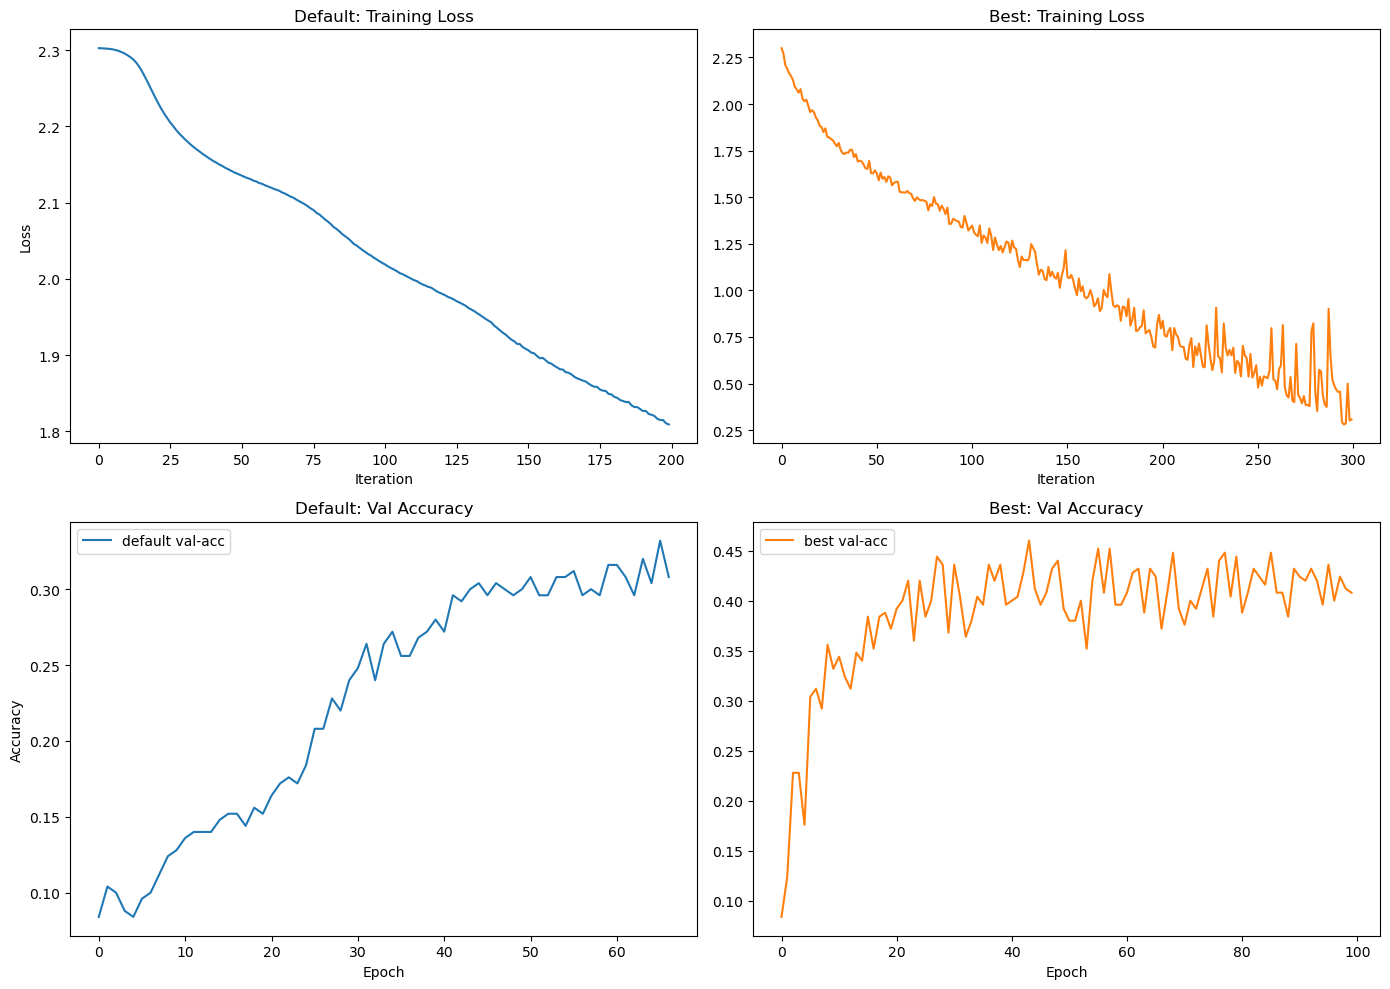

Weight visualization – default params


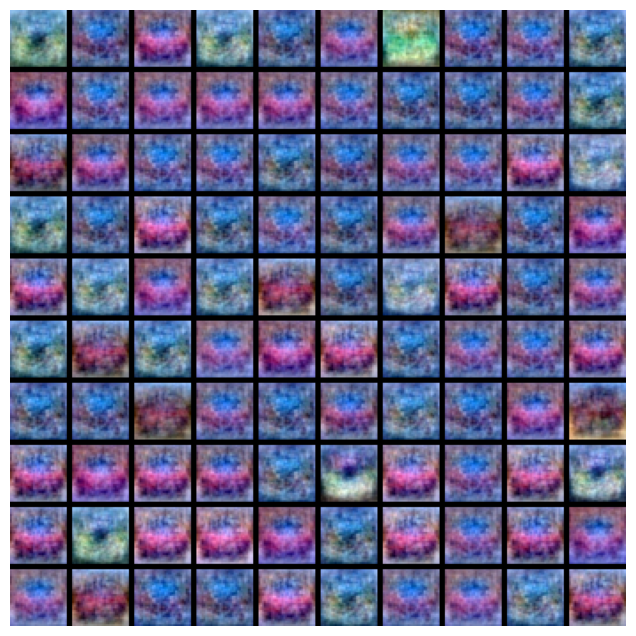

Weight visualization – best params


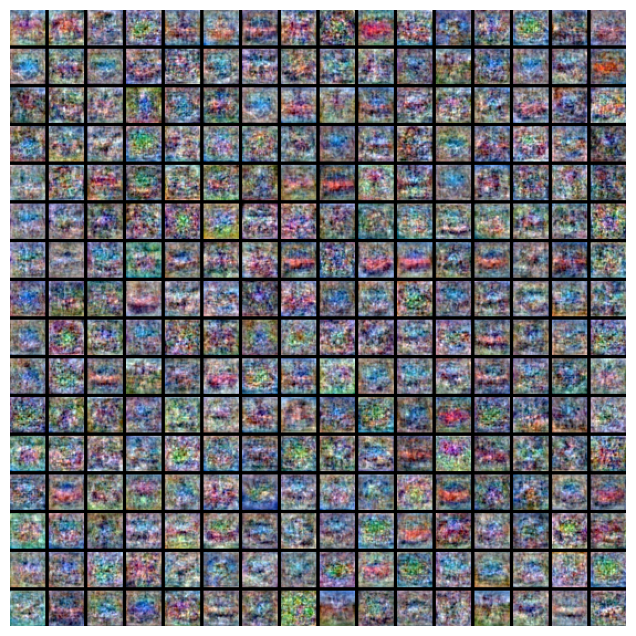

In [30]:
# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

best_lr, best_wd, best_epoch, best_hidden = best_net_hyperparams

def build_model(hidden_size):
    return Sequential(
        [Linear(input_size, hidden_size), ReLU(), Linear(hidden_size, num_classes), Softmax()]
    )

best_net   = build_model(best_hidden)
optim_best = SGD(best_net, lr=best_lr, weight_decay=best_wd)

trainer_best = Trainer(
    dataset,
    optim_best,
    best_net,
    CrossEntropyLoss(),
    best_epoch,
    batch_size,
    validate_interval=3,
)
train_error_best, val_acc_best_hist = trainer_best.train()

# TODO: Plot the training_error and validation_accuracy of the best network (5%)

# TODO: visualize the weights of the best network (5%)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(train_error, label="default")
axs[0, 0].set_title("Default: Training Loss")
axs[0, 0].set_xlabel("Iteration")
axs[0, 0].set_ylabel("Loss")

axs[0, 1].plot(train_error_best, label="best", color="tab:orange")
axs[0, 1].set_title("Best: Training Loss")
axs[0, 1].set_xlabel("Iteration")

axs[1, 0].plot(validation_accuracy, label="default val‑acc")
axs[1, 0].set_title("Default: Val Accuracy")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].legend()

axs[1, 1].plot(val_acc_best_hist, label="best val‑acc", color="tab:orange")
axs[1, 1].set_title("Best: Val Accuracy")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

print("Weight visualization – default params")
show_net_weights(net)

print("Weight visualization – best params")
show_net_weights(best_net)



# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [34]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)

Test accuracy:  0.402


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer: 1 & 3

#### Your Explanation:

The gap between high training accuracy and lower test accuracy signals overfitting.

(1) Train on a larger dataset provides more examples, reducing variance and improving generalization.

(3) Increase the regularization strength (e.g. higher weight decay or dropout) penalizes overly complex models and discourages memorization of the training set.
